In [5]:
import pandas as pd
import streamlit as st
import requests

In [6]:


import streamlit as st
from IPython.core.display import display, HTML


'''
# LexAI Website !!!
It's beautiful
'''


# API QUERIES
query = st.text_input("Search for a topic", 'agriculture')

import requests

#indices=['eurlex', 'consultations', 'twitter_query', 'twitter_press', 'twitter_politicians'])


## TWITTER
#lexai_twitter_url = "http://127.0.0.1:8000/predict"
#tweet_params=dict(keyword=query)
#tweet_likes = requests.get(lexai_twitter_url,params=tweet_params).json()

'''
## Twitter says nothing
'''
print(st.write('Tweets about this topic were liked by', 'people on Twitter'))

## Dashboard Style



## EURLEX
'''
## REGULATIONS
'''
lexai_eurlex_url = "http://127.0.0.1:8000/query"
tweet_params=dict(query=query,n=5)
eurlex = requests.get(lexai_eurlex_url,params=tweet_params).json()
for i in eurlex:
    st.write(eurlex[str(i)]['title'])
    st.write(eurlex[i]['author'])
    st.write(eurlex[i]['date'])
    st.write(eurlex[i]['link'])


2021-06-10 22:05:54.697 WARNING root: 
  command:

    streamlit run /Users/estefaniavidalbouzon/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]


None


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /query?query=agriculture&n=5 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x12e6b4f10>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [89]:

eurlex[str(0)]['date']


NameError: name 'eurlex' is not defined

In [90]:
# CONSULTS
'''
## OPEN CONSULTATIONS
'''
lexai_eurlex_url = "http://127.0.0.1:8000/query"
consults_params=dict(query=query,index='consultations',n=50)
consults = requests.get(lexai_eurlex_url,params=consults_params).json()
for i in consults:
    if consults[str(i)]['status']=='OPEN':
        st.write('Title: ',consults[i]['title'])
        st.write('Type of act: ',consults[i]['type_of_act'])
        st.write('Start date: ',consults[i]['start_date'])
        st.write('End date: ',consults[i]['end_date'])
        st.write('Link: ',consults[i]['link'])

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /query?query=agriculture&index=consultations&n=50 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x133282310>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [91]:
consults[str(0)]

NameError: name 'consults' is not defined

In [94]:
lexai_eurlex_url = "http://127.0.0.1:8000/query"
consults_params=dict(query=query,index='twitter_press',n=50)
press = requests.get(lexai_eurlex_url,params=consults_params).json()
for i in press:
    st.write('Title: ',consults[i]['title'])
    st.write('Type of act: ',consults[i]['type_of_act'])
    st.write('Start date: ',consults[i]['start_date'])
    st.write('End date: ',consults[i]['end_date'])
    st.write('Link: ',consults[i]['link'])

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /query?query=agriculture&index=twitter_press&n=50 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x12f0e9fd0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [95]:
press


NameError: name 'press' is not defined

In [96]:
query="covid"

In [97]:
def get_news():
    consult_params=dict(query=query,index='twitter_press',n=10)
    press = requests.get(lexai_eurlex_url,params=consult_params).json()
    info=[]
    for i in press:
        link = press[i]["link"]
        text= press[i]["text"]
        user= press[i]["user"]
        date= press[i]["date"]
        html_link = f'<blockquote class="twitter-tweet"><p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False)

In [98]:
from datetime import datetime

In [99]:
info= get_news()

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /query?query=covid&index=twitter_press&n=10 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x133242340>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [100]:
pandas.to_datetime(info["date"])

NameError: name 'pandas' is not defined

In [101]:
#sorting the tweets by date
dates= []
for tweet in range(len(info)):
    dates.append(info[tweet]["date"])

NameError: name 'info' is not defined

In [102]:
def get_news2():
    consult_params=dict(query=query,index='twitter_press',n=50)
    press = requests.get(lexai_eurlex_url,params=consult_params).json()
    info=[]
    for i in press:
        link = press[i]["link"]
        text= press[i]["text"]
        user= press[i]["user"]
        date= press[i]["date"]
        #html_link = f'<blockquote class="twitter-tweet"><p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        html_link = f'<blockquote data-cards="hidden" class="twitter-tweet"><p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False)


In [103]:
for i in range(len(html)):
    display(HTML(html[i]))

NameError: name 'html' is not defined

In [104]:
display(HTML(f'<blockquote data-cards="hidden" class="twitter-tweet"><p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'))


NameError: name 'link' is not defined

In [105]:
def df_filter(message,df):

        slider_1, slider_2 = st.slider('%s' % (message),0,len(df)-1,[0,len(df)-1],1)

        while len(str(df.iloc[slider_1][1]).replace('.0','')) < 4:
            df.iloc[slider_1,1] = '0' + str(df.iloc[slider_1][1]).replace('.0','')
            
        while len(str(df.iloc[slider_2][1]).replace('.0','')) < 4:
            df.iloc[slider_2,1] = '0' + str(df.iloc[slider_1][1]).replace('.0','')

        start_date = datetime.datetime.strptime(str(df.iloc[slider_1][0]).replace('.0','') + str(df.iloc[slider_1][1]).replace('.0',''),'%Y%m%d%H%M%S')
        start_date = start_date.strftime('%d %b %Y, %I:%M%p')
        
        end_date = datetime.datetime.strptime(str(df.iloc[slider_2][0]).replace('.0','') + str(df.iloc[slider_2][1]).replace('.0',''),'%Y%m%d%H%M%S')
        end_date = end_date.strftime('%d %b %Y, %I:%M%p')

        st.info('Start: **%s** End: **%s**' % (start_date,end_date))
        
        filtered_df = df.iloc[slider_1:slider_2+1][:].reset_index(drop=True)

        return filtered_df

In [106]:
start_date, end_date = st.date_picker("Pick a date range", [])

AttributeError: module 'streamlit' has no attribute 'date_picker'

In [107]:
from datetime import date

today = date.today()
today



datetime.date(2021, 6, 8)

In [108]:
query = st.text_input("Search for a topic", 'Technology')
c1, c2, c3 = st.beta_columns((1, 1, 2))

lexai_eurlex_url = "http://127.0.0.1:8000/query"
tweet_params=dict(query=query,n=5)
eurlex = requests.get(lexai_eurlex_url,params=tweet_params).json()


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /query?query=Technology&n=5 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x1332421c0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [109]:
eurlex

NameError: name 'eurlex' is not defined

In [110]:
def get_regulation():
    reg = []
    for i in eurlex:
        #It would be nice to have a list and small text
        title=eurlex[i]['title']
        author= eurlex[i]['author']
        date= pd.to_datetime(eurlex[i]['date']).date()
        link = eurlex[i]['link']
        reg.append({"title":title,"author":author,"date":date,"link":link})
    return pd.DataFrame(reg)

In [111]:
data = get_regulation()


NameError: name 'eurlex' is not defined

In [112]:
data


NameError: name 'data' is not defined

In [113]:
st.write(data[(data["date"] > start_date)& (data["date"] < end_date)][["title"]])





NameError: name 'data' is not defined

In [114]:
regulation

NameError: name 'regulation' is not defined

In [115]:

headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}


In [116]:
def get_regulation():
    lexai_url = "http://35.223.18.2/indexes/eurlex/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    reg = []
    for i in result["hits"]:
        title=i["title"]
        author= i['author']
        date= pd.to_datetime(i['date']).date()
        link = i['link']
        reg.append({"title":title,"author":author,"date":date,"link":link})
    
    return reg

In [117]:
get_regulation()

[{'title': 'Consolidated text: Regulation (EU) No 575/2013 of the European Parliament and of the Council of 26 June 2013 on prudential requirements for credit institutions and amending Regulation (EU) No 648/2012 (Text with EEA relevance)Text with EEA relevance',
  'author': 'Not available',
  'date': datetime.date(2023, 6, 28),
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=CELEX:02013R0575-20230628'},
 {'title': 'Consolidated text: Directive 2005/29/EC of the European Parliament and of the Council of 11 May 2005 concerning unfair business-to-consumer commercial practices in the internal market and amending Council Directive 84/450/EEC, Directives 97/7/EC, 98/27/EC and 2002/65/EC of the European Parliament and of the Council and Regulation (EC) No 2006/2004 of the European Parliament and of the Council (Unfair Commercial Practices Directive) (Text with EEA relevance)Text with EEA relevance',
  'author': 'Not available',
  'date': datetime.date(2022, 5, 28),
  'link': 'ht

In [ ]:
start_date, end_date = pd.to_datetime("2017/02/27").date(), pd.to_datetime("2021/04/27").date()


In [ ]:
print(type(end_date))

In [74]:

query = st.text_input("Search for a topic", 'Technology')

params=dict(q=query)

def get_consultations():
    lexai_url = "http://35.223.18.2/indexes/consultations/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    consultations = []
    for i in result["hits"]:
        title = i['title']
        topics = i['topics']
        type_of_act = i['type_of_act']
        status = i["status"]
        try:
            end_date = pd.to_datetime(i['end_date']).date()
        except:
            end_date = pd.to_datetime(i['end_date'])
        link = i['link']
        consultations.append({"title":title,"status":status,"topics":topics,"type_of_act":type_of_act,"end_date":end_date,"link":link})

    return consultations

In [75]:
get_consultations()

NameError: name 'pd' is not defined

In [ ]:

start_date, end_date = "2021/02/27", "2021/04/27"

start_date = pd.to_datetime(start_date).date()
end_date = pd.to_datetime(end_date).date()
regulation = get_regulation()



for i in consultations:
    if i["date"] >= start_date and i["date"] <= end_date:
        print(i["author"])        
        #i["date"] >= start_date & i["date"] <= end_date
        
        
        #st.write('Author: ',regulation[(i["date"] >= start_date)& (i["date"] <= end_date)]["author"])
        #st.write('Date: ',regulation[(i["date"] >= start_date)& (i["date"] <= end_date)]["date"])
        #st.write('Link: ',regulation[(i["date"] >= start_date)& (i["date"] <= end_date)]["link"])

     



In [ ]:


start_date, end_date = "2018/01/01", "2021/01/01"
start_date = pd.to_datetime(start_date).date()
end_date = pd.to_datetime(end_date).date()
consultation = get_consultations()
       

In [76]:
consultation

NameError: name 'consultation' is not defined

In [77]:
params=dict(q="", limit =20000)




lexai_url = "http://35.223.18.2/indexes/consultations/search"
result = requests.get(lexai_url,params=params,headers=headers).json()


def get_consultations():
    lexai_url = "http://35.223.18.2/indexes/consultations/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    consultations = []
    for i in result["hits"]:
        title = i['title']
        topics = i['topics']
        type_of_act = i['type_of_act']
        status =  i["status"]
        try:
            end_date = pd.to_datetime(i['end_date']).date()
        except:
            end_date = pd.to_datetime(i['end_date'])
        link = i['link']
        consultations.append({"title":title,"status":status,"topics":topics,"type_of_act":type_of_act,"end_date":end_date,"link":link})

    return consultations
    

In [78]:
consultation = get_consultations()
checkbox_val_1 = st.checkbox("Open")
checkbox_val_2 = st.checkbox("Closed")
checkbox_val_3 = st.checkbox("Upcoming")
checkbox_val_4 = st.checkbox("Disabled")
checkbox_val_5 = st.checkbox("Other")
expander2=st.beta_expander("expand")

for i in consultation:
    if i["status"]=="OPEN":
        print('Title: ',i["title"])
        print('Status: ',i["status"])                
        print('Topic: ',i["topics"])
        print('Type of act: ',i["type_of_act"])
        print('End date: ',i["end_date"])
        print('Link: ',i["link"])
    else:
        None



NameError: name 'pd' is not defined

In [ ]:
def get_news():
    lexai_url = "http://35.223.18.2/indexes/twitter_press/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    info=[]
    for i in result["hits"]:
        link = i["link"]
        text= i["text"]
        user= i["user"]
        date= i["date"]
        html_link = f'<blockquote data-cards="hidden" class="twitter-tweet" data-height="10%" data-width="100%"> <p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False)

def get_politicians():
    lexai_url = "http://35.223.18.2/indexes/twitter_politicians/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    info=[]
    for i in result["hits"]:
        link = i["link"]
        text= i["text_en"]
        user= i["user"]
        date= i["date"]
        html_link = f'<blockquote data-cards="hidden" class="twitter-tweet" data-height="10%" data-width="100%"> <p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False)

In [ ]:
lexai_url = "http://35.223.18.2/indexes/twitter_politicians/search"
result = requests.get(lexai_url,params=params,headers=headers).json()

In [ ]:
params=dict(q="Technology", limit =20000)

def get_news():
    lexai_url = "http://35.223.18.2/indexes/twitter_press/search"
    result = requests.get(lexai_url,params=params,headers=headers).json()
    info=[]
    for i in result["hits"]:
        link = i["link"]
        if i["text_en"]:
            text= i["text_en"]
        else:
            text= i["text"]
        user= i["user"]
        date= i["date"]
        html_link = f'<blockquote data-cards="hidden" class="twitter-tweet" data-height="10%" data-width="100%"> <p lang="en" dir="ltr">{text}.<a href={link}</a></p>&mdash; {user} (@{user}) <a href={link}>{date}</a> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>'
        info.append({"link":link,"text":text,"user":user,"date":date,"html_link":html_link})
    return pd.DataFrame(info).sort_values(by="date", ascending=False).reset_index()



In [ ]:
get_news()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
params=dict(q='',limit=100)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}
lexai_url = f"http://35.223.18.2/indexes/twitter_query/search/"
data = requests.get(lexai_url,params=params,headers=headers).json()
data_df=pd.DataFrame(data['hits'])


In [ ]:
tweets = []
    for i in result["hits"]:
        sentiment = i['sentiment']
        link = i['link']

    return consultations

In [ ]:
from dateutil.relativedelta import relativedelta # to add days or years


In [ ]:
today = datetime.now()
limit_date = today + relativedelta(days=-7)
limit_date

In [79]:
datetime.now().timestamp()

1623169314.641765

In [80]:
today_time = today.timestamp()
limit_time = limit_date.timestamp()

AttributeError: 'datetime.date' object has no attribute 'timestamp'

In [81]:
params=dict(q='', filters= f"timestamp > {limit_time}", limit=100000)
headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}
lexai_url = f"http://35.223.18.2/indexes/twitter_query/search/"
data = requests.get(lexai_url,params=params,headers=headers).json()

len(data["hits"])

NameError: name 'limit_time' is not defined

NameError: name 'data_df' is not defined

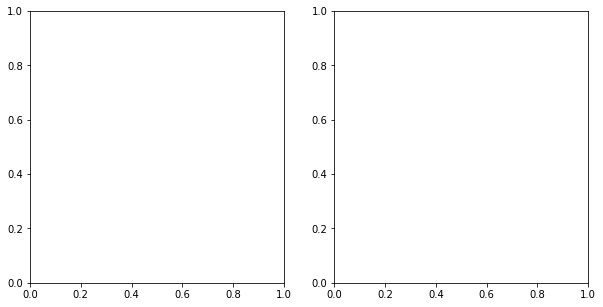

<Figure size 720x360 with 0 Axes>

In [82]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plt.figure(figsize=(10,5))


def label_function(val):
    return f'{val:.0f}%'

data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax1)
data_df.groupby('sentiment').size().plot(kind='pie',colors=['tomato', 'lightgrey', '#b5eb9a'], 
                                         autopct=label_function, ax=ax2)
ax1.set_ylabel('On topic', size=22)
ax2.set_ylabel('All tweets', size=22)
plt.tight_layout()
plt.show()

In [ ]:
today = datetime.now()
limit_date = today + relativedelta(days=-7)
today_time = today.timestamp()
limit_time = limit_date.timestamp()


#params
params=dict(q=query)
tweet_params=dict(q=query, filters= f"timestamp > {limit_time}", limit=100000)
tweet_params_without_query = dict(q="", filters= f"timestamp > {limit_time}")

headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}


#Data from News
lexai_url_news = "http://35.223.18.2/indexes/twitter_press/search"
news = requests.get(lexai_url_news,params=tweet_params,headers=headers).json()

#Data from Politicians
lexai_url_politicians = "http://35.223.18.2/indexes/twitter_politicians/search"
politicians = requests.get(lexai_url_politicians,params=tweet_params,headers=headers).json()

#Data from General
lexai_url_general = f"http://35.223.18.2/indexes/twitter_query/search/"
full_data_general = requests.get(lexai_url_general,params=tweet_params_without_query,headers=headers).json()
query_data_general = requests.get(lexai_url_general,params=tweet_params,headers=headers).json()




general_df = pd.DataFrame(query_data_general["hits"]) 
news_df = pd.DataFrame(news["hits"]) 
politicians_df = pd.DataFrame(politicians["hits"]) 

In [83]:
hashtags=[]
for i in general_df['hashtags']:
    if i !='':
        for j in i.lower().split(', '):
            hashtags.append(j)
for i in news_df['hashtags']:
    if i !='':
        for j in i.lower().split(', '):
            hashtags.append(j)
for i in politicians_df['hashtags']:
    if i !='':
        for j in i.lower().split(', '):
            hashtags.append(j)

NameError: name 'general_df' is not defined

In [84]:

            
text=' '.join(item for item in hashtags)


# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(8, 16))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
# Import package
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add(query)
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 400, random_state=1, background_color='white', colormap='gray', mode='RGB', collocations=False, stopwords = STOPWORDS, max_words=10).generate(text)
# Plot
plot_cloud(wordcloud)


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [85]:
today = datetime.now()
limit_date = today + relativedelta(days=-7)
today_time = today.timestamp()
limit_time = limit_date.timestamp()


#params
params=dict(q=query)
tweet_params=dict(q=query, filters= f"timestamp > {limit_time}")
tweet_params_without_query = dict(q="", filters= f"timestamp > {limit_time}")

headers={'X-Meili-API-Key':'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}


#Data from News
lexai_url_news = "http://35.223.18.2/indexes/twitter_press/search"
news = requests.get(lexai_url_news,params=tweet_params,headers=headers).json()

#Data from Politicians
lexai_url_politicians = "http://35.223.18.2/indexes/twitter_politicians/search"
politicians = requests.get(lexai_url_politicians,params=tweet_params,headers=headers).json()

#Data from General
lexai_url_general = f"http://35.223.18.2/indexes/twitter_query/search/"
full_data_general = requests.get(lexai_url_general,params=tweet_params_without_query,headers=headers).json()
query_data_general = requests.get(lexai_url_general,params=tweet_params,headers=headers).json()


NameError: name 'relativedelta' is not defined

In [165]:
query= "Technology"

params=dict(q=query, limit = 500)




lexai_url = "http://35.223.18.2/indexes/eurlex/search"
result = requests.get(lexai_url,params=params,headers=headers).json()
data_eurlex_df = pd.DataFrame(result["hits"])
import altair as alt
import numpy as np
import pandas as pd

data_eurlex_df['year/month']=data_eurlex_df['date'].str[0:7]

source=data_eurlex_df
alt.Chart(source).mark_bar().encode(
    alt.X('year/month',title='Year / Month'),
    alt.Y('count(year/month)',title='Number of laws')
).properties(width=600).configure_axis(grid=False)



alt.Chart(...)

In [ ]:
data_eurlex_df['year/month']=data_eurlex_df['date'].str[0:7]

alt.Chart(data_eurlex_df).mark_bar().encode(
        alt.X('year/month',title='Year / Month'),
        alt.Y('count(year/month)',title='Number of laws')).properties(width=600).configure_axis(grid=False)

In [ ]:
    '''
    ## Twitter User locations'''
    
    data_df=pd.DataFrame(query_data_general['hits'])
    data_df = data_df.sort_values(by=['timestamp'])
    data_dict = data_df.to_dict('records')   #creates dictionary for further use
    df_europe = pd.read_csv('list_cities3.csv', delimiter= ';')
    list_cities = list(df_europe['city'])
    list_countries = list(df_europe['country'])
   
    ####### sorting by countries #######

    def get_country(city):
        
        #translates city-name to country name
        
        country = df_europe.loc[df_europe['city'] == city, 'country'].iloc[0]
        return country


    def region_lat(region):
        geolocator = Nominatim(user_agent='myapplication')
        try:
            location = geolocator.geocode(region)
            latitude = location[1][0]
            longitude = location[1][1]
        except:
            latitude = 'NaN'
            longitude = 'NaN'
            
        return latitude


    def region_lon(region):
        geolocator = Nominatim(user_agent='myapplication')
        try:
            location = geolocator.geocode(region)
            latitude = location[1][0]
            longitude = location[1][1]
        except:
            latitude = 'NaN'
            longitude = 'NaN'
            
        return longitude


    def count_countries(tweets):
            
        country_counts = {
        
        'country': [],
        'tweets':[],
        'likes': [],
        'retweets': [],
        'sentiment': []
        }
        
        
        for tweet in tweets:
            if ',' in tweet['user_loc']:
                list_loc = tweet['user_loc'].split(',')
                if list_loc[1] in list_countries:
                    country_counts['country'].append(list_loc[1])
                    country_counts['likes'].append(tweet['favorite_count'])
                    country_counts['tweets'].append(1)
                    country_counts['retweets'].append(tweet['retweet_count'])
                    country_counts['sentiment'].append(tweet['compound_score'])
                    
                if list_loc[0] in list_cities:
                    country_counts['country'].append(get_country(list_loc[0])) #translates city to country
                    country_counts['likes'].append(tweet['favorite_count'])
                    country_counts['tweets'].append(1)
                    country_counts['retweets'].append(tweet['retweet_count'])
                    country_counts['sentiment'].append(tweet['compound_score'])

                
                
            elif tweet['user_loc'] in list_cities:
                country_counts['country'].append(get_country(tweet['user_loc']))
                country_counts['likes'].append(tweet['favorite_count'])
                country_counts['tweets'].append(1)
                country_counts['retweets'].append(tweet['retweet_count'])
                country_counts['sentiment'].append(tweet['compound_score'])
                
            elif tweet['user_loc'] in list_countries:
                country_counts['country'].append(tweet['user_loc'])
                country_counts['likes'].append(tweet['favorite_count'])
                country_counts['tweets'].append(1)
                country_counts['retweets'].append(tweet['retweet_count'])
                country_counts['sentiment'].append(tweet['compound_score'])
                
        return country_counts



    country_counts = count_countries(data_dict)
    df_country_counts = pd.DataFrame(country_counts)

    df_country_counts = df_country_counts.dropna()
    df_country_counts = df_country_counts.groupby(by="country", as_index=False).sum()

    df_country_counts['lat'] = df_country_counts['country'].apply(region_lat)
    df_country_counts['lon'] = df_country_counts['country'].apply(region_lon)
    df_country_counts["radius"] = df_country_counts["retweets"].apply(lambda likes: math.sqrt(likes)*1000 + 10000)

    df_country_counts.to_csv('country_counts.csv')

    ######streamlit part#####
    
    st.title('Twitter User locations')

    #map_tweets = pd.read_csv('region_count.csv')

    map_tweets_loc = pd.read_csv('country_counts.csv')

    st.pydeck_chart(pdk.Deck(
    map_style='mapbox://styles/mapbox/light-v9',
    initial_view_state=pdk.ViewState(
        latitude=52.520,
        longitude=-13.404,
        zoom=5,
        pitch=50,
    ),
    layers = [pdk.Layer(
            'ScatterplotLayer',
            data=map_tweets_loc,
            get_position='[lon, lat]',
            get_color='[200, 30, 0, 160]',
            get_radius= 'radius',
        ),
        ],
    ))

In [14]:
headers = {'X-Meili-API-Key': 'OTkwNzQ0ZGRkZTc0NDcwM2RlMzFlOGIx'}
params = dict(q=query)


In [28]:
def get_regulation():
    lexai_url = "http://35.223.18.2/indexes/eurlex/search"
    result = requests.get(lexai_url, params=params, headers=headers).json()
    reg = []
    for i in result["hits"]:
        title = i["title"]
        author = i['author']
        date = pd.to_datetime(i['date']).date()
        link = i['link']
        reg.append({
            "title": title,
            "author": author,
            "date": date,
            "link": link
        })

    return reg

In [30]:
get_regulation()

[{'title': 'Opinion of the European Committee of the Regions — Agro-ecology',
  'author': 'European Committee of the Regions, Commission for Natural Resources',
  'date': datetime.date(2021, 2, 5),
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=CELEX:52020IR3137'},
 {'title': 'Decision No 1/2020 of the Joint Committee on Agriculture of 31 July 2020 on amending Annex 12 to the Agreement between the European Community and the Swiss Confederation on trade in agricultural products [2020/1386]',
  'author': 'EU–Switzerland Joint Committee',
  'date': datetime.date(2020, 7, 31),
  'link': 'https://eur-lex.europa.eu/legal-content/AUTO/?uri=CELEX:22020D1386'},
 {'title': 'COMMISSION STAFF WORKING DOCUMENT ASSESSMENT OF THE REVISED NATIONAL FORESTRY ACCOUNTING PLANS 2021-2025 Accompanying the document Commission Delegated Regulation amending Annex IV to Regulation (EU) 2018/841 of the European Parliament and of the Council as regards the forest reference levels to be applied by th

In [31]:
def get_regulation():
    lexai_url = "http://35.223.18.2/indexes/eurlex/search"
    result = requests.get(lexai_url, params=params, headers=headers).json()
    reg = []
    for i in result["hits"]:
        title = i["title"]
        author = i['author']
        date = pd.to_datetime(i['date']).date()
        link = i['link']
        reg.append({
            "title": title,
            "author": author,
            "date": date,
            "link": link
        })

    return pd.DataFrame(reg).sort_values(by=["date"] ,ascending= False).reset_index()


In [36]:
## Range selector
regulation = get_regulation()
for i in range(len(regulation)):
    print(regulation["title"][i])
    print(regulation["date"][i])


COMMISSION STAFF WORKING DOCUMENT EXECUTIVE SUMMARY OF THE EVALUATION of the impact of the Common Agricultural Policy on climate change and greenhouse gas emissions
2021-05-21
COMMISSION STAFF WORKING DOCUMENT EVALUATION of the impact of the Common Agricultural Policy on climate change and greenhouse gas emissions
2021-05-21
COMMISSION STAFF WORKING DOCUMENT EXECUTIVE SUMMARY OF THE EVALUATION of the instruments applicable to State aid in the agricultural and forestry sectors and in rural areas
2021-05-11
COMMISSION STAFF WORKING DOCUMENT EVALUATION of the instruments applicable to State aid in the agricultural and foresty sectors and in rural areas
2021-05-11
Notice to economic operators New round of requests for the suspension of the autonomous Common Customs Tariff duties on certain industrial and agricultural products 2021/C 136/06
2021-04-19
Proposal for a REGULATION OF THE EUROPEAN PARLIAMENT AND OF THE COUNCIL on statistics on agricultural input and output and repealing Regulati

In [23]:
regulation

,index,title,author,date,link
0,9,COMMISSION STAFF WORKING DOCUMENT EXECUTIVE SU...,"European Commission, Directorate-General for A...",2021-05-21,https://eur-lex.europa.eu/legal-content/AUTO/?...
1,3,COMMISSION STAFF WORKING DOCUMENT EVALUATION o...,"European Commission, Directorate-General for A...",2021-05-21,https://eur-lex.europa.eu/legal-content/AUTO/?...
2,13,COMMISSION STAFF WORKING DOCUMENT EXECUTIVE SU...,"European Commission, Directorate-General for C...",2021-05-11,https://eur-lex.europa.eu/legal-content/AUTO/?...
3,7,COMMISSION STAFF WORKING DOCUMENT EVALUATION o...,"European Commission, Directorate-General for C...",2021-05-11,https://eur-lex.europa.eu/legal-content/AUTO/?...
4,18,Notice to economic operators New round of requ...,"European Commission, Directorate-General for T...",2021-04-19,https://eur-lex.europa.eu/legal-content/AUTO/?...
5,10,Proposal for a REGULATION OF THE EUROPEAN PARL...,Council of the European Union,2021-03-22,https://eur-lex.europa.eu/legal-content/AUTO/?...
6,17,Order of the President of the General Court of...,General Court,2021-02-23,https://eur-lex.europa.eu/legal-content/AUTO/?...
7,16,Order of the President of the General Court of...,General Court,2021-02-23,https://eur-lex.europa.eu/legal-content/AUTO/?...
8,0,Opinion of the European Committee of the Regio...,"European Committee of the Regions, Commission ...",2021-02-05,https://eur-lex.europa.eu/legal-content/AUTO/?...
9,11,Proposal for a REGULATION OF THE EUROPEAN PARL...,Council of the European Union,2021-02-02,https://eur-lex.europa.eu/legal-content/AUTO/?...


In [37]:
def get_consultations():
    lexai_url = "http://35.223.18.2/indexes/consultations/search"
    result = requests.get(lexai_url, params=params, headers=headers).json()
    consultations = []
    for i in result["hits"]:
        title = i['title']
        topics = i['topics']
        type_of_act = i['type_of_act']
        status = i["status"]
        try:
            end_date = pd.to_datetime(i['end_date']).date()
        except:
            end_date = pd.to_datetime(i['end_date'])
        link = i['link']
        consultations.append({
            "title": title,
            "status": status,
            "topics": topics,
            "type_of_act": type_of_act,
            "end_date": end_date,
            "link": link
        })
    return pd.DataFrame(consultations).sort_values(by=["end_date"] ,ascending= False).reset_index()

In [44]:
st.title("Consultations")

checkbox_val_1 = st.checkbox("Open", value=True)
checkbox_val_2 = st.checkbox("Upcoming", value=True)
checkbox_val_3 = st.checkbox("Closed")
checkbox_val_4 = st.checkbox("Disabled")
checkbox_val_5 = st.checkbox("Other")

consultation = get_consultations()

for i in range(len(consultation)):

    if consultation["status"][i] == "OPEN":
        consultation["title"][i]
        consultation["status"][i]
        consultation["topics"][i]
        consultation["type_of_act"][i]
        consultation["end_date"][i]
        print(i)


    if consultation["status"][i] == "UPCOMING":
        consultation["title"][i]
        consultation["status"][i]
        consultation["topics"][i]
        consultation["type_of_act"][i]
        consultation["end_date"][i]
        print(i)


    if consultation["status"][i] == "CLOSED":
        consultation["title"][i]
        consultation["status"][i]
        consultation["topics"][i]
        consultation["type_of_act"][i]
        consultation["end_date"][i]
        print(i)

    if consultation["status"][i] == "DISABLE":
        consultation["title"][i]
        consultation["status"][i]
        consultation["topics"][i]
        consultation["type_of_act"][i]
        consultation["end_date"][i]
        print(i)

    if consultation["status"][i] == "OTHER":
        consultation["title"][i]
        consultation["status"][i]
        consultation["topics"][i]
        consultation["type_of_act"][i]
        consultation["end_date"][i]
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
18
